In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Covid-19 Johns Hopkins Data 
# Cases data

covid_df_cases = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
covid_df_cases = covid_df_cases.loc[(covid_df_cases.iso2=='US')]

covid_df_cases = covid_df_cases.rename(columns={'FIPS':'fips', 'Admin2':'county', 'Province_State':'state', '5/18/20':'cases'})
covid_df_cases = covid_df_cases[['state','county','fips','cases']]
covid_df_cases.dropna(inplace=True)
covid_df_cases['fips'] = covid_df_cases['fips'].astype('int64')
covid_df_cases


state      county   fips  cases
5           Alabama     Autauga   1001    120
6           Alabama     Baldwin   1003    260
7           Alabama     Barbour   1005     85
8           Alabama        Bibb   1007     50
9           Alabama      Blount   1009     47
...             ...         ...    ...    ...
3245       Virginia  Unassigned  90051      0
3246     Washington  Unassigned  90053     54
3247  West Virginia  Unassigned  90054      0
3248      Wisconsin  Unassigned  90055      0
3249        Wyoming  Unassigned  90056      0

[3244 rows x 4 columns]

In [3]:
# Covid-19 Johns Hopkins Data 
# Deaths data

covid_df_deaths = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
covid_df_deaths = covid_df_deaths.loc[(covid_df_deaths.iso2=='US')]
covid_df_deaths = covid_df_deaths.rename(columns={'FIPS':'fips', 'Admin2':'county', 'Province_State':'state', '5/18/20':'deaths'})
covid_df_deaths = covid_df_deaths[['fips','deaths']]
covid_df_deaths.dropna(inplace=True)
covid_df_deaths['fips'] = covid_df_deaths['fips'].astype('int64')
covid_df_deaths


fips  deaths
5      1001       4
6      1003       8
7      1005       1
8      1007       1
9      1009       1
...     ...     ...
3248  90053       0
3249  90054       0
3250  90055       0
3251  90056       9
3252  99999       3

[3246 rows x 2 columns]

In [4]:
# USA facts population data
# https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

pop_df = pd.read_csv(r'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')
pop_df = pop_df.rename(columns={'countyFIPS':'fips'})
pop_df = pop_df[['fips','population']]


In [5]:
#cases, deaths merge
covid_df_cases_deaths = pd.merge(covid_df_cases, covid_df_deaths, how='inner', on='fips') 

#population merge 
covid_df = pd.merge(covid_df_cases_deaths, pop_df, how='inner', on='fips') 


# add some variables
covid_df['combined_key'] = covid_df['county'] + ', ' + covid_df['state']
covid_df['cases_per_100k'] = covid_df['cases']/covid_df['population']*100000
covid_df['deaths_per_100k'] = covid_df['deaths']/covid_df['population']*100000


# float format 
pd.options.display.float_format = '{:,.2f}'.format


# merge "rural_urban_code"
# https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx

ruralurbancodes_df = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\ruralurbancodes2013.xlsx')
ruralurbancodes_df = ruralurbancodes_df.rename(columns={'RUCC_2013':'rural_urban_code'})

metro_code = [1,2,3]
not_metro_code = [4,5,6,7,8,9]

ruralurbancodes_df.loc[ruralurbancodes_df['rural_urban_code'].isin(metro_code), 'metro'] = 1
ruralurbancodes_df.loc[ruralurbancodes_df['rural_urban_code'].isin(not_metro_code), 'metro'] = 2                   
ruralurbancodes_df.metro = ruralurbancodes_df.metro.astype('int64')
ruralurbancodes_df = ruralurbancodes_df[['fips','rural_urban_code','metro']]

# merge two datasets
covid_df = pd.merge(covid_df, ruralurbancodes_df, how='inner', on='fips')
covid_df.fips  = covid_df.fips.astype('int64')

covid_df.info()
covid_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             3140 non-null   object 
 1   county            3140 non-null   object 
 2   fips              3140 non-null   int64  
 3   cases             3140 non-null   int64  
 4   deaths            3140 non-null   int64  
 5   population        3140 non-null   int64  
 6   combined_key      3140 non-null   object 
 7   cases_per_100k    3140 non-null   float64
 8   deaths_per_100k   3140 non-null   float64
 9   rural_urban_code  3140 non-null   int64  
 10  metro             3140 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 294.4+ KB


state   county  fips  cases  deaths  population      combined_key  \
0  Alabama  Autauga  1001    120       4       55869  Autauga, Alabama   
1  Alabama  Baldwin  1003    260       8      223234  Baldwin, Alabama   
2  Alabama  Barbour  1005     85       1       24686  Barbour, Alabama   
3  Alabama     Bibb  1007     50       1       22394     Bibb, Alabama   
4  Alabama   Blount  1009     47       1       57826   Blount, Alabama   

   cases_per_100k  deaths_per_100k  rural_urban_code  metro  
0          214.79             7.16                 2      1  
1          116.47             3.58                 3      1  
2          344.32             4.05                 6      2  
3          223.27             4.47                 1      1  
4           81.28             1.73                 1      1

In [19]:
covid_df[covid_df.county=='New York']

state    county   fips   cases  deaths  population  \
1857  New York  New York  36061  193230   20806     1628706   

            combined_key  cases_per_100k  deaths_per_100k  rural_urban_code  \
1857  New York, New York       11,864.02         1,277.46                 1   

      metro  
1857      1

In [12]:
### Risk factors data
# SVI index : https://svi.cdc.gov/data-and-tools-download.html

risk_df1 = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\Github_upload\USA_covid19_SVI2018.xlsx')
risk_df1 = risk_df1.rename(columns={'FIPS':'fips'})
risk_df1 = risk_df1[['fips', 'E_HU','E_HH','E_POV','E_UNEMP','E_PCI','E_NOHSDP','E_AGE65','E_AGE17',
                     'E_DISABL','E_SNGPNT','E_MINRTY','E_LIMENG','E_MUNIT','E_MOBILE','E_CROWD','E_NOVEH',
                     'E_GROUPQ', 'RPL_THEMES']]
risk_df1 = risk_df1.rename(columns={'E_HU':'housing_units', 'E_HH':'households',
                                    'E_POV':'poverty', 'E_UNEMP':'unemployed', 'E_PCI':'per_capita_income',
                                    'E_NOHSDP':'no_hs_diploma','E_AGE65':'age65_over','E_AGE17':'age17_under',
                                    'E_DISABL':'disability','E_SNGPNT':'single_parent',
                                    'E_MINRTY':'minority','E_LIMENG':'speak_eng_less',
                                    'E_MUNIT':'multi_unit','E_MOBILE':'mobile_homes',
                                    'E_CROWD':'crowd','E_NOVEH':'no_vehicle',
                                    'E_GROUPQ':'institutionalized', 'RPL_THEMES':'svi_index'})
risk_df1.head()

fips  housing_units  households  poverty  unemployed  per_capita_income  \
0  35039          20044       12398     -999        -999               -999   
1   1001          23315       21115     8422        1065              29372   
2   1009          24222       20600     8220         909              22656   
3   1013          10026        6708     4640         567              20430   
4   1015          53682       45033    20819        4628              24706   

   no_hs_diploma  age65_over  age17_under  disability  single_parent  \
0           3669        7083         9318        6280           1330   
1           4204        8050        13369       10465           1586   
2           7861       10233        13468        8114           1437   
3           2141        3806         4566        3492            704   
4          12620       19386        25196       23598           4701   

   minority  speak_eng_less  multi_unit  mobile_homes  crowd  no_vehicle  \
0     34397             755          67          7770    264         763   
1     13788             426         886          4279    299        1191   
2      7413             934         211          6108    339         856   
3      9641              93         134          2625    119         520   
4     31675            1076        1990          7904    772        2599   

   institutionalized  svi_index  
0                654    -999.00  
1                546       0.44  
2                543       0.42  
3                322       0.87  
4               3112       0.83

In [13]:
# USA Census data
# https://www.census.gov/en.html

risk_df2 = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\Github_upload\USA_covid19_risk_factors.xlsx')
risk_df2 = risk_df2[['fips', 'Hispanic', 'White', 'Black', 'Native', 'Asian' ,'passenger_miles','unlinked_passenger','land_area','density_population','density_housing',
                      'nurse_practitioners','physician_assistants', 'hospitals', 'primarycare_physicians',                      
                      'emergency_medicine_specialists', 'icu_beds']]
risk_df2.head()


fips  Hispanic  White  Black  Native  Asian  passenger_miles  \
0  1001      2.70  75.40  18.90    0.30   0.90                0   
1  1003      4.40  83.10   9.50    0.80   0.70          3272549   
2  1005      4.20  45.70  47.80    0.20   0.60                0   
3  1007      2.40  74.60  22.00    0.40   0.00                0   
4  1009      9.00  87.40   1.50    0.30   0.10                0   

   unlinked_passenger  land_area  density_population  density_housing  \
0                   0     594.44               91.80            37.20   
1              318721   1,589.78              114.60            65.50   
2                   0     884.88               31.00            13.40   
3                   0     622.58               36.80            14.40   
4                   0     644.78               88.90            37.00   

   nurse_practitioners  physician_assistants  hospitals  \
0                28.86                  6.09       1.15   
1               113.16                 23.86       4.51   
2                12.91                  2.72       0.51   
3                11.63                  2.45       0.46   
4                30.02                  6.33       1.20   

   primarycare_physicians  emergency_medicine_specialists  icu_beds  
0                   66.69                            5.29         6  
1                  261.52                           20.74        51  
2                   29.84                            2.37         5  
3                   26.87                            2.13         0  
4                   69.38                            5.50         6

In [14]:
# pm25 data
# https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/physical-environment/air-water-quality/air-pollution-particulate-matter

risk_df3 = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\Github_upload\USA_covid19_risk_pm25.xlsx')
risk_df3 = risk_df3.drop(['state','county'], axis=1)
risk_df3.head()

fips  average_daily_pm25
0  1000               11.00
1  1001               11.70
2  1003               10.30
3  1005               11.50
4  1007               11.20

In [15]:
# CDC risk factors data

risk_df4 = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\Github_upload\USA_covid19_risk_illness.xlsx')
risk_df4 = risk_df4.drop(['county_state','age65_over','institutionalized'], axis=1)
risk_df4.head()

fips  asthma  lung_disease  diabetes  heart_disease  smoking  obesity  \
0     1.00    1.33          6.25     16.19         310.59      nan      nan   
1 1,001.00    1.07          5.72     15.45         316.36    18.08    33.30   
2 1,003.00    0.94          6.34     13.44         272.04    17.49    31.00   
3 1,005.00    1.63          6.47     19.36         255.09    22.00    41.70   
4 1,007.00    1.31          5.55     16.68         378.09    19.11    37.60   

   lung_cancer  liver_cancer  colon_rectum_cancer  pancreatic_cancer  
0         4.90          7.54                27.72              14.24  
1         4.86          7.23                28.76              13.77  
2         4.56          6.92                23.43              12.38  
3         5.04          8.18                31.87              15.50  
4         5.30          7.74                29.82              15.02

In [16]:
# Risk factors merge 

risk_df12 = pd.merge(risk_df1,  risk_df2,  how='inner', on='fips')   
risk_df34 = pd.merge(risk_df3,  risk_df4,  how='inner', on='fips')   
risk_df   = pd.merge(risk_df12, risk_df34, how='inner', on='fips')   

risk_df.head()
#risk_df.to_csv(r'C:\Users\totot\OneDrive\Kurvv\Covid19\02_USA\US_covid19_risk_factors.csv', index = False)     


fips  housing_units  households  poverty  unemployed  per_capita_income  \
0  35039          20044       12398     -999        -999               -999   
1   1001          23315       21115     8422        1065              29372   
2   1009          24222       20600     8220         909              22656   
3   1013          10026        6708     4640         567              20430   
4   1015          53682       45033    20819        4628              24706   

   no_hs_diploma  age65_over  age17_under  disability  ...  asthma  \
0           3669        7083         9318        6280  ...    1.10   
1           4204        8050        13369       10465  ...    1.07   
2           7861       10233        13468        8114  ...    1.09   
3           2141        3806         4566        3492  ...    1.74   
4          12620       19386        25196       23598  ...    1.14   

   lung_disease  diabetes  heart_disease  smoking  obesity  lung_cancer  \
0          8.23     18.30         209.99    17.93    28.30         4.93   
1          5.72     15.45         316.36    18.08    33.30         4.86   
2          5.26     15.06         307.90    19.21    33.80         5.02   
3          5.40     18.87         382.55    21.77    43.30         4.86   
4          5.40     16.51         368.25    20.61    38.50         4.81   

   liver_cancer  colon_rectum_cancer  pancreatic_cancer  
0          9.36                23.52              11.34  
1          7.23                28.76              13.77  
2          6.41                23.74              12.92  
3          7.32                34.42              15.59  
4          8.39                31.61              14.79  

[5 rows x 46 columns]

In [17]:
### All datasets merge 

# merge covid dataset & risk dataset 
df = pd.merge(covid_df, risk_df, how='inner', on='fips') 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 0 to 2758
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           2759 non-null   object 
 1   county                          2759 non-null   object 
 2   fips                            2759 non-null   int64  
 3   cases                           2759 non-null   int64  
 4   deaths                          2759 non-null   int64  
 5   population                      2759 non-null   int64  
 6   combined_key                    2759 non-null   object 
 7   cases_per_100k                  2759 non-null   float64
 8   deaths_per_100k                 2759 non-null   float64
 9   rural_urban_code                2759 non-null   int64  
 10  metro                           2759 non-null   int64  
 11  housing_units                   2759 non-null   int64  
 12  households                      27

state   county  fips  cases  deaths  population      combined_key  \
0  Alabama  Autauga  1001    120       4       55869  Autauga, Alabama   
1  Alabama  Baldwin  1003    260       8      223234  Baldwin, Alabama   
2  Alabama  Barbour  1005     85       1       24686  Barbour, Alabama   
3  Alabama     Bibb  1007     50       1       22394     Bibb, Alabama   
4  Alabama   Blount  1009     47       1       57826   Blount, Alabama   

   cases_per_100k  deaths_per_100k  rural_urban_code  ...  asthma  \
0          214.79             7.16                 2  ...    1.07   
1          116.47             3.58                 3  ...    0.94   
2          344.32             4.05                 6  ...    1.63   
3          223.27             4.47                 1  ...    1.31   
4           81.28             1.73                 1  ...    1.09   

   lung_disease  diabetes  heart_disease  smoking  obesity  lung_cancer  \
0          5.72     15.45         316.36    18.08    33.30         4.86   
1          6.34     13.44         272.04    17.49    31.00         4.56   
2          6.47     19.36         255.09    22.00    41.70         5.04   
3          5.55     16.68         378.09    19.11    37.60         5.30   
4          5.26     15.06         307.90    19.21    33.80         5.02   

   liver_cancer  colon_rectum_cancer  pancreatic_cancer  
0          7.23                28.76              13.77  
1          6.92                23.43              12.38  
2          8.18                31.87              15.50  
3          7.74                29.82              15.02  
4          6.41                23.74              12.92  

[5 rows x 56 columns]

In [18]:
# missing value check  
column_with_nan = df.columns[df.isnull().any()]
for column in column_with_nan:
    print(column, df[column].isnull().sum())
    

# missing value upate
df = df.fillna(0)


average_daily_pm25 17


In [19]:
df.columns

Index(['state', 'county', 'fips', 'cases', 'deaths', 'population',
       'combined_key', 'cases_per_100k', 'deaths_per_100k', 'rural_urban_code',
       'metro', 'housing_units', 'households', 'poverty', 'unemployed',
       'per_capita_income', 'no_hs_diploma', 'age65_over', 'age17_under',
       'disability', 'single_parent', 'minority', 'speak_eng_less',
       'multi_unit', 'mobile_homes', 'crowd', 'no_vehicle',
       'institutionalized', 'svi_index', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'passenger_miles', 'unlinked_passenger', 'land_area',
       'density_population', 'density_housing', 'nurse_practitioners',
       'physician_assistants', 'hospitals', 'primarycare_physicians',
       'emergency_medicine_specialists', 'icu_beds', 'average_daily_pm25',
       'asthma', 'lung_disease', 'diabetes', 'heart_disease', 'smoking',
       'obesity', 'lung_cancer', 'liver_cancer', 'colon_rectum_cancer',
       'pancreatic_cancer'],
      dtype='object')

In [20]:
df_corr = df.loc[df.metro==1][['cases', 'population', 'housing_units',
       'households', 'poverty', 'unemployed', 'per_capita_income',
       'no_hs_diploma', 'age65_over', 'age17_under', 'disability',
       'single_parent', 'minority', 'speak_eng_less', 'multi_unit',
       'mobile_homes', 'crowd', 'no_vehicle', 'institutionalized', 'svi_index',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'passenger_miles',
       'unlinked_passenger', 'land_area', 'density_population',
       'density_housing', 'nurse_practitioners', 'physician_assistants',
       'hospitals', 'primarycare_physicians', 'emergency_medicine_specialists',
       'icu_beds', 'average_daily_pm25', 'asthma', 'lung_disease', 'diabetes',
       'heart_disease', 'smoking', 'obesity', 'lung_cancer', 'liver_cancer',
       'colon_rectum_cancer', 'pancreatic_cancer']]


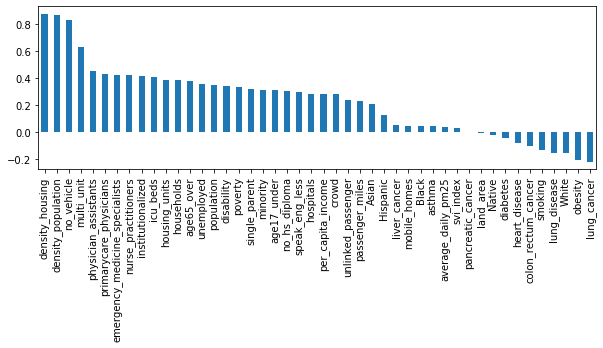

In [71]:
#Correlation between "confirmed" and the other numeric features
corr = df_corr.corr()["cases"].sort_values(ascending=False)
plt.figure(figsize=(10,3))
corr.drop("cases").plot.bar()
plt.show()


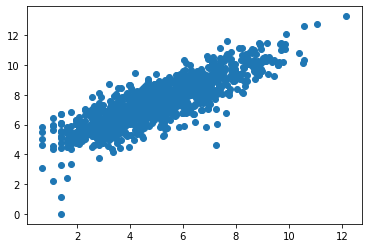

In [29]:
# scatter plot 
plt.scatter(np.log1p(df_corr.cases), np.log1p(df_corr.no_vehicle))


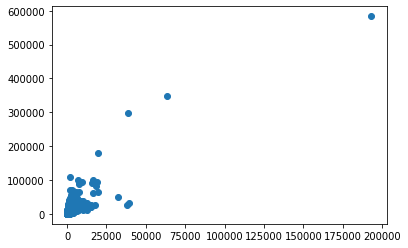

In [21]:
plt.scatter(df_corr.cases, df_corr.no_vehicle)

In [30]:
df[df.fips==36061]

state    county   fips   cases  deaths  population  \
1634  New York  New York  36061  193230   20806     1628706   

            combined_key  cases_per_100k  deaths_per_100k  rural_urban_code  \
1634  New York, New York       11,864.02         1,277.46                 1   

      ...  asthma  lung_disease  diabetes  heart_disease  smoking  obesity  \
1634  ...    1.98          3.04     13.11         201.86    12.42    14.60   

      lung_cancer  liver_cancer  colon_rectum_cancer  pancreatic_cancer  
1634         2.54          7.72                17.67              12.09  

[1 rows x 56 columns]

In [31]:
# most top 10 counties

def group_sum(metro_code, var1, var2, var3, var4):
    temp = df[df.metro==metro_code][['combined_key', 'fips', 'metro', var1, var2, var3]].nlargest(5, var4).reset_index(drop=True)
    return temp

group_sum(1, 'cases', 'population', 'cases_per_100k', 'cases')
#group_sum(2, 'deaths', 'population', 'deaths_per_100k', 'deaths')


combined_key   fips  metro   cases  population  cases_per_100k
0       New York, New York  36061      1  193230     1628706       11,864.02
1           Cook, Illinois  17031      1   63690     5150233        1,236.64
2         Nassau, New York  36059      1   39225     1356924        2,890.73
3  Los Angeles, California   6037      1   38458    10039107          383.08
4        Suffolk, New York  36103      1   38224     1476601        2,588.65

In [32]:
df.columns

Index(['state', 'county', 'fips', 'cases', 'deaths', 'population',
       'combined_key', 'cases_per_100k', 'deaths_per_100k', 'rural_urban_code',
       'metro', 'housing_units', 'households', 'poverty', 'unemployed',
       'per_capita_income', 'no_hs_diploma', 'age65_over', 'age17_under',
       'disability', 'single_parent', 'minority', 'speak_eng_less',
       'multi_unit', 'mobile_homes', 'crowd', 'no_vehicle',
       'institutionalized', 'svi_index', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'passenger_miles', 'unlinked_passenger', 'land_area',
       'density_population', 'density_housing', 'nurse_practitioners',
       'physician_assistants', 'hospitals', 'primarycare_physicians',
       'emergency_medicine_specialists', 'icu_beds', 'average_daily_pm25',
       'asthma', 'lung_disease', 'diabetes', 'heart_disease', 'smoking',
       'obesity', 'lung_cancer', 'liver_cancer', 'colon_rectum_cancer',
       'pancreatic_cancer'],
      dtype='object')

In [33]:
# Dataframe for Analysis

df_new =df.loc[df.metro==2][['cases', 'housing_units',
       'households', 'poverty', 'unemployed', 'per_capita_income',
       'no_hs_diploma', 'age65_over', 'age17_under', 'disability',
       'single_parent', 'minority', 'speak_eng_less', 'multi_unit',
       'mobile_homes', 'crowd', 'no_vehicle', 'institutionalized', 'svi_index',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'passenger_miles',
       'unlinked_passenger', 'land_area', 'density_population',
       'density_housing','average_daily_pm25', 'asthma', 'lung_disease', 'diabetes',
       'heart_disease', 'smoking', 'obesity', 'lung_cancer', 'liver_cancer',
       'colon_rectum_cancer', 'pancreatic_cancer']]

df_new.dropna(how="any", inplace=True)

# target variable
y = df_new.iloc[:,0]
# log transformation
y = np.log1p(y)

# features
X = df_new.iloc[:, 1: ]


### Split Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


### feature scaling
'''
#StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#RobustScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)
'''

print('Training X Shape:', X_train.shape)
print('Testing  X Shape:', X_test.shape)


Training X Shape: (1293, 39)
Testing  X Shape: (324, 39)


In [37]:
### parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7826149856987785
{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


In [34]:
###Random Forest Regression Train Model

#Import the model we are using
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(bootstrap=True, max_features='auto', min_samples_split=2, n_estimators=10)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
#rf = RandomForestRegressor()

#Train the model on training data
rf.fit(X_train, y_train)

### Random Forest Regression Train Model
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
score = rf.score(X_train,y_train)

print ("R2 of Random Forest Regression:", score)
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

R2 of Random Forest Regression: 0.9396556132558598
MAE:  0.7763447394120542
MSE:  1.0704513675884806
RMSE: 1.034626197033731
RMSLE: 0.27262965775637005


Text(0.5, 0, 'Relative Importance')

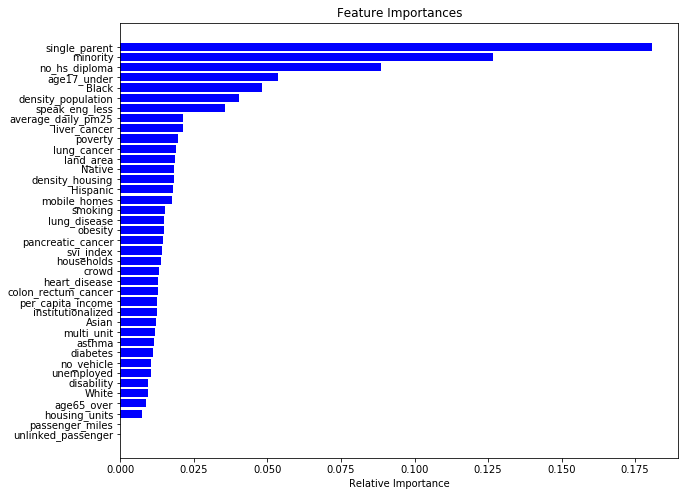

In [32]:
### feature_importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


In [40]:
# Define feature_list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];
#[print("{}".format(*pair)) for pair in feature_importances];

Variable: unemployed                               Importance: 0.42
Variable: age17_under                              Importance: 0.13
Variable: single_parent                            Importance: 0.08
Variable: minority                                 Importance: 0.06
Variable: no_vehicle                               Importance: 0.03
Variable: housing_units                            Importance: 0.02
Variable: households                               Importance: 0.02
Variable: speak_eng_less                           Importance: 0.02
Variable: density_population                       Importance: 0.02
Variable: per_capita_income                        Importance: 0.01
Variable: no_hs_diploma                            Importance: 0.01
Variable: age65_over                               Importance: 0.01
Variable: mobile_homes                             Importance: 0.01
Variable: institutionalized                        Importance: 0.01
Variable: Hispanic                              

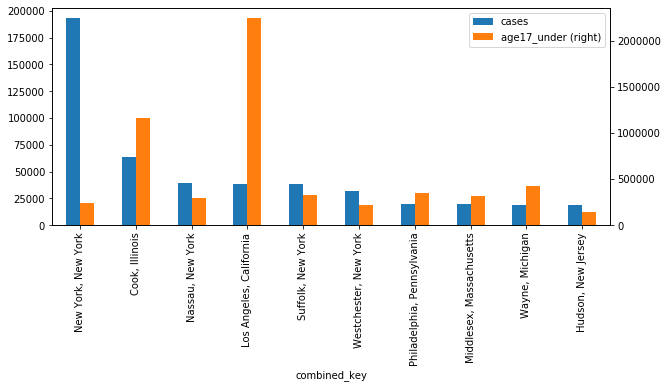

In [29]:
# feature importance variable graph

xvar  = 'combined_key'
yvar1 = 'cases'
yvar2 = 'age17_under'
metro = 1

gr = df.loc[df.metro==metro][[xvar, yvar1, yvar2]].sort_values(by=[yvar1], ascending=False).nlargest(10, yvar1)
gr.plot(x=xvar, y=[yvar1, yvar2], secondary_y=yvar2, kind='bar', figsize=(10,4))

# Interpret Model and Visualization

In [44]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                #class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [35]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=146866379, splitter='best')

C:\Users\totot\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


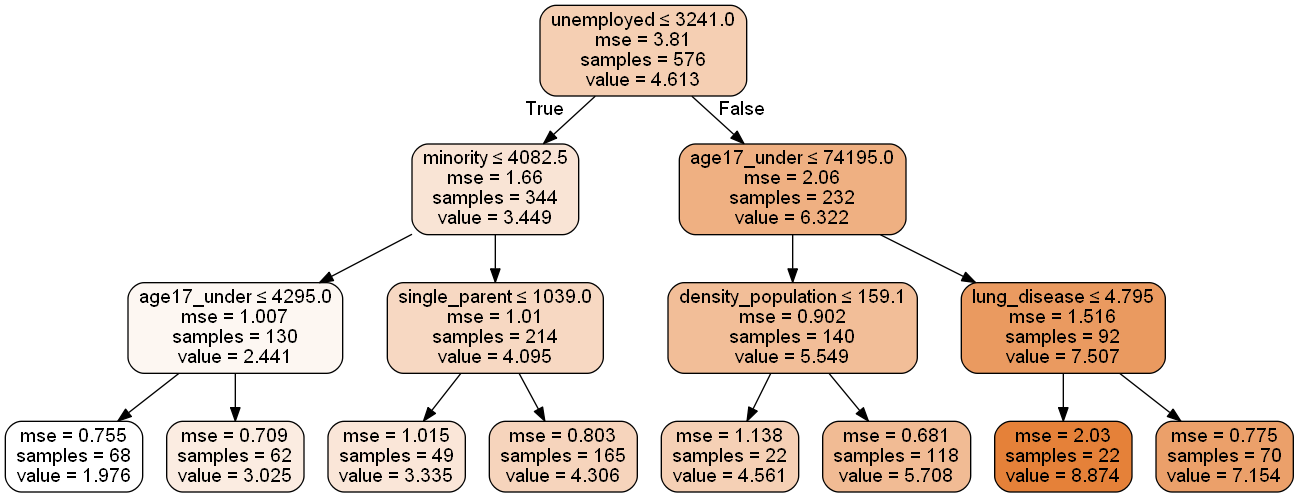

In [36]:
#pip install pydotplus --no-cache-dir --no-binary :all:

# 1.Download and install graphviz-2.38.msi
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# Set the path variable
# Control Panel > System and Security > System > Advanced System Settings > Advanced> Environment Variables > Path > Edit
# add 'C:\Program Files (x86)\Graphviz2.38\bin'

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Text(0.5, 1.0, 'Distribution of residuals')

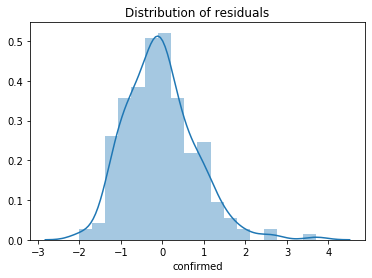

In [37]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred)
plt.title('Distribution of residuals')

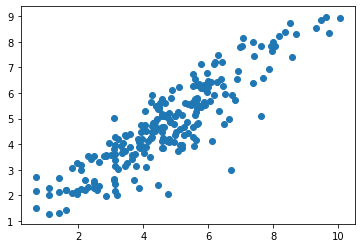

In [38]:
# y_test & y_pred scatter plot
plt.scatter(y_test,y_pred)